# Hotel Data Analysis

In this notebook we have 5 hotels: 
1. Holiday Inn Los Angeles International Airport
2. Shores Resort and Spa
3. Best Western Plus Eagle Rock Inn
4. Best Western The Hotel California
5. Four Seasons Hotel George V Paris

we analyze the data first and then we try to find the best hotel, out of above mentioned, for the token provided

In [2]:
from nltk.tokenize import sent_tokenize
from IPython.display import display
import pandas as pd
import numpy as np
import json
import csv
import sys
import json_to_csv
%matplotlib inline

In [3]:
#To make it easy to analyze the data I parsed the json Review parts into csv files for each hotel
%run json_to_csv Reviews reviews1.json r1.csv
%run json_to_csv Reviews reviews2.json r2.csv
%run json_to_csv Reviews reviews3.json r3.csv
%run json_to_csv Reviews reviews4.json r4.csv
%run json_to_csv Reviews reviews5.json r5.csv

Just completed writing csv file with 15 columns
Just completed writing csv file with 15 columns
Just completed writing csv file with 15 columns
Just completed writing csv file with 12 columns
Just completed writing csv file with 15 columns


In [4]:
#load the csv files into a list variable 
reviews=[]
files = ['r1.csv', 'r2.csv', 'r3.csv', 'r4.csv', 'r5.csv']
for f in files:
    reviews.append(pd.read_csv(f))

In [5]:
# we iterate over each hotel data and see if any values are missing
for r in reviews:
    display(r.isnull().any())

Reviews_Author                                              False
Reviews_AuthorLocation                                       True
Reviews_Content                                             False
Reviews_Date                                                False
Reviews_Ratings_Business service (e.g., internet access)     True
Reviews_Ratings_Check in / front desk                        True
Reviews_Ratings_Cleanliness                                  True
Reviews_Ratings_Location                                     True
Reviews_Ratings_Overall                                     False
Reviews_Ratings_Rooms                                        True
Reviews_Ratings_Service                                      True
Reviews_Ratings_Sleep Quality                                True
Reviews_Ratings_Value                                        True
Reviews_ReviewID                                            False
Reviews_Title                                               False
dtype: boo

Reviews_Author                                              False
Reviews_AuthorLocation                                       True
Reviews_Content                                             False
Reviews_Date                                                False
Reviews_Ratings_Business service (e.g., internet access)     True
Reviews_Ratings_Check in / front desk                        True
Reviews_Ratings_Cleanliness                                  True
Reviews_Ratings_Location                                     True
Reviews_Ratings_Overall                                     False
Reviews_Ratings_Rooms                                        True
Reviews_Ratings_Service                                      True
Reviews_Ratings_Sleep Quality                                True
Reviews_Ratings_Value                                        True
Reviews_ReviewID                                            False
Reviews_Title                                               False
dtype: boo

Reviews_Author                                              False
Reviews_AuthorLocation                                      False
Reviews_Content                                             False
Reviews_Date                                                False
Reviews_Ratings_Business service (e.g., internet access)     True
Reviews_Ratings_Check in / front desk                        True
Reviews_Ratings_Cleanliness                                 False
Reviews_Ratings_Location                                     True
Reviews_Ratings_Overall                                     False
Reviews_Ratings_Rooms                                        True
Reviews_Ratings_Service                                     False
Reviews_Ratings_Sleep Quality                                True
Reviews_Ratings_Value                                       False
Reviews_ReviewID                                            False
Reviews_Title                                               False
dtype: boo

Reviews_Author                           False
Reviews_Content                          False
Reviews_Date                             False
Reviews_Ratings_Business service         False
Reviews_Ratings_Check in / front desk    False
Reviews_Ratings_Cleanliness              False
Reviews_Ratings_Location                 False
Reviews_Ratings_Overall                  False
Reviews_Ratings_Rooms                    False
Reviews_Ratings_Service                  False
Reviews_Ratings_Value                    False
Reviews_ReviewID                         False
dtype: bool

Reviews_Author                                              False
Reviews_AuthorLocation                                       True
Reviews_Content                                             False
Reviews_Date                                                False
Reviews_Ratings_Business service (e.g., internet access)     True
Reviews_Ratings_Check in / front desk                        True
Reviews_Ratings_Cleanliness                                  True
Reviews_Ratings_Location                                     True
Reviews_Ratings_Overall                                     False
Reviews_Ratings_Rooms                                        True
Reviews_Ratings_Service                                      True
Reviews_Ratings_Sleep Quality                                True
Reviews_Ratings_Value                                        True
Reviews_ReviewID                                            False
Reviews_Title                                               False
dtype: boo

As you can see that most of the columns has missing values but 4th hotel has all the values present but whole columns are missing. Also name of one column is different in that too.

In [6]:
# the following function describes the different statistics for the numerical data fields
for r in reviews:
    display(r.shape)
    display(r.describe())

(188, 15)

,"Reviews_Ratings_Business service (e.g., internet access)",Reviews_Ratings_Check in / front desk,Reviews_Ratings_Cleanliness,Reviews_Ratings_Location,Reviews_Ratings_Overall,Reviews_Ratings_Rooms,Reviews_Ratings_Service,Reviews_Ratings_Sleep Quality,Reviews_Ratings_Value
count,22.000000,30.000000,168.000000,139.000000,188.000000,150.000000,164.000000,86.000000,167.000000
mean,3.136364,3.433333,3.589286,3.446043,3.132979,3.406667,3.286585,3.488372,3.347305
std,1.283427,1.072648,1.154685,1.143175,1.274336,1.193363,1.314223,1.299268,1.321409
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.750000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


(364, 15)

,"Reviews_Ratings_Business service (e.g., internet access)",Reviews_Ratings_Check in / front desk,Reviews_Ratings_Cleanliness,Reviews_Ratings_Location,Reviews_Ratings_Overall,Reviews_Ratings_Rooms,Reviews_Ratings_Service,Reviews_Ratings_Sleep Quality,Reviews_Ratings_Value
count,34.000000,47.000000,350.000000,314.000000,364.000000,314.000000,354.000000,212.000000,347.000000
mean,4.205882,4.148936,4.377143,4.493631,4.225275,4.378981,4.214689,4.339623,4.072046
std,1.038046,1.122472,0.939757,0.784204,1.077605,0.886356,1.116048,0.982180,1.108557
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.250000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


(13, 15)

,"Reviews_Ratings_Business service (e.g., internet access)",Reviews_Ratings_Check in / front desk,Reviews_Ratings_Cleanliness,Reviews_Ratings_Location,Reviews_Ratings_Overall,Reviews_Ratings_Rooms,Reviews_Ratings_Service,Reviews_Ratings_Sleep Quality,Reviews_Ratings_Value
count,4.000000,5.000000,13.000000,11.000000,13.000000,11.000000,13.000000,6.000000,13.000000
mean,3.750000,3.800000,4.153846,3.818182,3.384615,3.545455,3.615385,3.666667,3.615385
std,0.957427,1.095445,0.987096,0.873863,0.869718,1.035725,0.960769,1.505545,1.192928
min,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,4.000000,3.500000,3.000000,3.000000,3.000000,3.250000,3.000000
50%,3.500000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.250000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.750000,4.000000
max,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000


(142, 12)

,Reviews_Ratings_Business service,Reviews_Ratings_Check in / front desk,Reviews_Ratings_Cleanliness,Reviews_Ratings_Location,Reviews_Ratings_Overall,Reviews_Ratings_Rooms,Reviews_Ratings_Service,Reviews_Ratings_Value
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.971831,1.225352,2.535211,1.246479,3.507042,2.323944,2.345070,2.042254
std,2.509397,2.602220,2.491580,2.560437,1.177487,2.255173,2.417565,2.449123
min,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,3.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,3.500000,-1.000000,4.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


(369, 15)

,"Reviews_Ratings_Business service (e.g., internet access)",Reviews_Ratings_Check in / front desk,Reviews_Ratings_Cleanliness,Reviews_Ratings_Location,Reviews_Ratings_Overall,Reviews_Ratings_Rooms,Reviews_Ratings_Service,Reviews_Ratings_Sleep Quality,Reviews_Ratings_Value
count,79.000000,108.000000,335.000000,281.000000,369.000000,305.000000,341.000000,146.000000,334.000000
mean,4.696203,4.814815,4.910448,4.797153,4.712737,4.806557,4.739003,4.787671,4.173653
std,0.739966,0.671839,0.399526,0.497988,0.765333,0.583735,0.796631,0.666529,1.051137
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Max value : for almost all the columns for all hotels is 5, that is the highest rating.

Min value : for hotel number 1,2,5 is 1 (hotel 2 has 2 min rating for business service)
            hotel 4 has min value for rating -1 (I am not sure about hotel 4 as -1 doesn't seem like a valid value but I am going to assume that it is valid)  and hotel 3 has min value of 3 and 2 for few variables and 1 for the rest
            We can conclude at a high level from this behavious of rating that hotel 3 customers didn't get into that much bad experience as others. 

Now we have max of 9 columns with numerical values, I will take explore these columns for each hotel one by one (maybe not all)

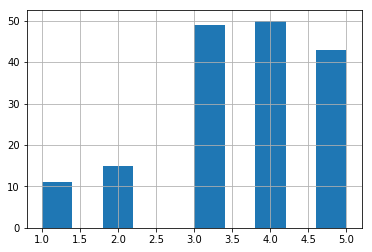

In [18]:
reviews[0]['Reviews_Ratings_Cleanliness'].hist()

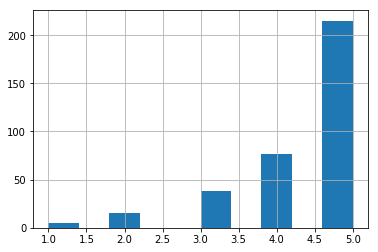

In [19]:
reviews[1]['Reviews_Ratings_Cleanliness'].hist()

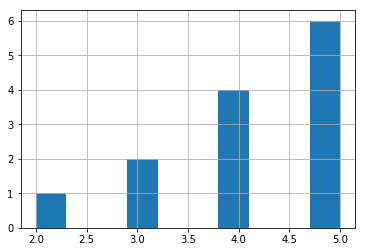

In [20]:
reviews[2]['Reviews_Ratings_Cleanliness'].hist()

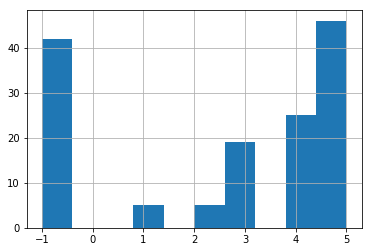

In [21]:
reviews[3]['Reviews_Ratings_Cleanliness'].hist()

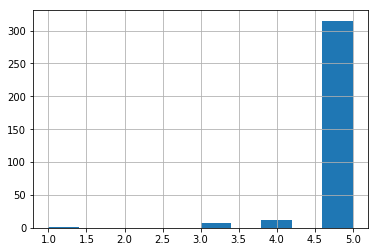

In [25]:
reviews[4]['Reviews_Ratings_Cleanliness'].hist()